In [1]:
using Gillespie
using Gadfly
using KernelDensity

  likely near /Users/el613/.julia/v0.6/Gillespie/src/Gillespie.jl:5
  likely near /Users/el613/.julia/v0.6/Gillespie/src/SSA.jl:521
  likely near /Users/el613/.julia/v0.6/Gillespie/src/SSA.jl:521
  likely near /Users/el613/.julia/v0.6/Gillespie/src/SSA.jl:521


In [69]:
function tumorgrowth2(x,p)
    (c1,c2) = x
    (b1,d1,b2,d2) = p
    a1 = b1*c1 #clone1 birth
    a2 = d1*c1 #clone1 death
    a3 = b2*c2
    a4 = d2*c2
    [a1,a2,a3,a4]
end

function tumorgrowth_w_migration(x,p)
    (c1,c2) = x
    (b1,d1,b2,d2,ki) = p
    a1 = b1*c1 #clone1 birth
    a2 = d1*c1 #clone1 death
    a3 = b2*c2
    a4 = d2*c2
    a5 = ki*c1 #clone1 changes to clone2 (becomes immunogenic?)
    [a1,a2,a3,a4, a5]
end

tumorgrowth_w_migration (generic function with 1 method)

6399

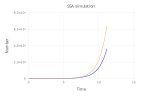

In [110]:
S = [[1 0];[-1 0];[0 1];[0 -1]]
#S = [[1 0];[-1 0];[0 1];[0 -1];[-1 1]]

x0 = [3, 1]
p = [1, 0.1, 1, 0.1]
tfinal = 10000.0

result = ssaN(x0, tumorgrowth2, S, p, tfinal)
data = ssa_data(result);
print(data[:x1][end])
plot(data,
    layer(x=:time,y=:x1,Geom.step,Theme(default_color=colorant"orange")),
    layer(x=:time,y=:x2,Geom.step,Theme(default_color=colorant"blue")),
    Guide.xlabel("Time"),
    Guide.ylabel("Number"),
    Guide.title("SSA simulation"),
)

In [122]:
#d0 is fixed at 0.1, vary d_
p = [1, 0.1, 1, 0.1]

Nfinal = 10000.0


for j=0:1:15
    C1 = []
C2 = []
#for j = 9:2:23
for i = 1:10000
    x0 = [j, 1]
    result = ssaN(x0, tumorgrowth2, S, p, Nfinal)
    data = ssa_data(result)
    push!(C1, data[:x1][end])
    push!(C2, data[:x2][end])
end
#    C1_noext = C1[(C1.!=1001) .* (C1.!=0)]/1001
#append!(mp.layers, layer(x=(1-C1_noext)/2, Geom.density))
#end

C2_allsize_noext = C2[(C1+C2).!=0]/(Nfinal+1)
writedlm("../../Simulation_results/Single_clone/Clone_"*string(j)*"_"*string(p[4])*".txt", C2_allsize_noext)
end

In [123]:
C1_clonesize = C1[(C1.!=(Nfinal+1)) .* (C1.!=0)]/(Nfinal+1)
C2_clonesize = C2[(C2.!=(Nfinal+1)) .* (C2.!=0)]/(Nfinal+1)
C2_allsize = C2/(Nfinal+1)
C2_allsize_noext = C2[(C1+C2).!=0]/(Nfinal+1)

10000-element Array{Float64,1}:
 0.0444956 
 0.0147985 
 0.0163984 
 0.211479  
 0.0       
 0.0       
 0.120188  
 0.0868913 
 0.209679  
 0.10439   
 0.0777922 
 0.0524948 
 0.0584942 
 ⋮         
 0.0205979 
 0.0       
 0.0488951 
 0.0287971 
 0.00369963
 0.0611939 
 0.0468953 
 0.0178982 
 0.0059994 
 0.0207979 
 0.0       
 0.20238   

In [124]:
sum((C1+C2).==0)

0

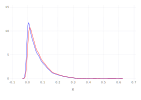

In [125]:
plot(layer(x=C2_clonesize,Geom.density,Theme(default_color=colorant"red")),
     layer(x=C2_allsize_noext,Geom.density,Theme(default_color=colorant"blue")))

In [259]:
writedlm("tmp_neg.txt", C2_noext_neg)

In [216]:
draw(SVG("Neutral_clone.svg", 6inch, 5inch), mp)

false

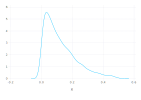

In [210]:
C1_noext = C1[(C1.!=1001) .* (C1.!=0)]/1001
mp = plot(x=(1-C1_noext)/2, Geom.density)

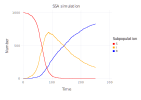

In [17]:
function F(x,parms)
  (S,I,R) = x
  (beta,gamma) = parms
  infection = beta*S*I
  recovery = gamma*I
  [infection,recovery]
end

x0 = [999,1,0]
nu = [[-1 1 0];[0 -1 1]]
parms = [0.1/1000.0,0.01]
tf = 250.0
#srand(1234)

result = ssa(x0,F,nu,parms,tf)

data = ssa_data(result)

plot_theme = Theme(
    panel_fill=colorant"white",
    default_color=colorant"black"
)
p=plot(data,
    layer(x=:time,y=:x1,Geom.step,Theme(default_color=colorant"red")),
    layer(x=:time,y=:x2,Geom.step,Theme(default_color=colorant"orange")),
    layer(x=:time,y=:x3,Geom.step,Theme(default_color=colorant"blue")),
    Guide.xlabel("Time"),
    Guide.ylabel("Number"),
    Guide.title("SSA simulation"),
    Guide.manual_color_key("Subpopulation",["S","I","R"],["red","orange","blue"]),
    plot_theme
)

In [213]:
collect(8:2:26)

10-element Array{Int64,1}:
  8
 10
 12
 14
 16
 18
 20
 22
 24
 26